# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np


In [78]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [79]:
# frequency table for prestige and whether or not someone was admitted
df_raw.groupby('prestige')

## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [94]:
dummy_ranks = pd.get_dummies(df_raw['prestige'], prefix='prestige') 
print dummy_ranks.head() 



   prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0             0             0             1             0
1             0             0             1             0
2             1             0             0             0
3             0             0             0             1
4             0             0             0             1


#### 2.2 When modeling our class variables, how many do we need? 



Answer: n-1

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [93]:
cols_to_keep = ['admit', 'gre', 'gpa'] 
df2 = df_raw[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':]) 
print df2.head() 
df2['intercept'] = 1.0

   admit  gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380  3.61             0             1             0
1      1  660  3.67             0             1             0
2      1  800  4.00             0             0             0
3      1  640  3.19             0             0             1
4      0  520  2.93             0             0             1


In [89]:
#crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [90]:
x = (2.0/5)
y = (3.0/5)
print x/y


0.666666666667


#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [91]:
print y/x

1.5


#### 3.3 Calculate the odds ratio

In [104]:
np.exp(df2['prestige_2.0', 'prestige_3.0', ]

# wasn't sure the type of hand calculation you wanted here



,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0,intercept
0,1.000000,1.076225e+165,36.966053,1.000000,2.718282,1.000000,2.718282
1,2.718282,4.308817e+286,39.251906,1.000000,2.718282,1.000000,2.718282
2,2.718282,inf,54.598150,1.000000,1.000000,1.000000,2.718282
3,2.718282,8.881134e+277,24.288427,1.000000,1.000000,2.718282,2.718282
4,1.000000,6.809741e+225,18.727630,1.000000,1.000000,2.718282,2.718282
5,2.718282,inf,20.085537,2.718282,1.000000,1.000000,2.718282
6,2.718282,1.602913e+243,19.687817,1.000000,1.000000,1.000000,2.718282
7,1.000000,5.221470e+173,21.758402,2.718282,1.000000,1.000000,2.718282
8,2.718282,3.303849e+234,29.665952,1.000000,2.718282,1.000000,2.718282
9,1.000000,1.014232e+304,50.400445,2.718282,1.000000,1.000000,2.718282


#### 3.4 Write this finding in a sentenance: 

Answer: 

#### 3.5 Print the cross tab for prestige_4

#### 3.6 Calculate the OR 

#### 3.7 Write this finding in a sentence

Answer:

## Part 4. Analysis

In [147]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
print data.head()


   admit  gre   gpa  prestige_2  prestige_3  prestige_4
0      0  380  3.61           0           0           0
1      1  660  3.67           1           0           0
2      1  800  4.00           0           1           0
3      1  640  3.19           0           0           1
4      0  520  2.93           0           0           0


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [148]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

In [149]:
train_cols = data.columns[1:] 


#### 4.2 Fit the model

In [150]:
logit = sm.Logit(data['admit'], data[train_cols]) 
result = logit.fit() 


Optimization terminated successfully.
         Current function value: 0.597847
         Iterations 5


#### 4.3 Print the summary results

In [151]:
print result.summary()
print result.conf_int()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Thu, 24 Mar 2016   Pseudo R-squ.:                 0.04326
Time:                        18:10:48   Log-Likelihood:                -237.35
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 0.0006619
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0025      0.001      2.379      0.017         0.000     0.005
gpa            0.7082      0.323      2.192      0.028         0.075     1.341
prestige_2     0.3664      0.320      1.144      0.2

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [152]:
print result.conf_int()

                   0         1
gre         0.000446  0.004618
gpa         0.075048  1.341310
prestige_2 -0.261237  0.993955
prestige_3 -0.180807  1.063228
prestige_4 -0.556165  0.730280
intercept  -7.070558 -2.790324


In [153]:
print np.exp(result.params)
params = result.params 
conf = result.conf_int() 
conf['OR'] = params 
conf.columns = ['2.5%', '97.5%', 'OR'] 
print np.exp(conf) 


gre           1.002535
gpa           2.030291
prestige_2    1.442473
prestige_3    1.554588
prestige_4    1.090959
intercept     0.007223
dtype: float64
                2.5%     97.5%        OR
gre         1.000446  1.004629  1.002535
gpa         1.077936  3.824050  2.030291
prestige_2  0.770098  2.701901  1.442473
prestige_3  0.834597  2.895704  1.554588
prestige_4  0.573404  2.075661  1.090959
intercept   0.000850  0.061401  0.007223


#### 4.5 Interpret the OR of Prestige_2

Answer: if you attend a school listed under Prestige 2 your odds of admittance will be affected by 0.506548 (expect a decrease of .50) --so every 1 unit, which in this case is a binary Y/N = 1/0

#### 4.6 Interpret the OR of GPA

Answer: For every 1 unit increase in GPA odds of admittance increase 2.18 so upping your GPA a whole point doubles your odds of getting in

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [154]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [155]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


#### 5.1 Recreate the dummy variables

In [156]:
# recreate the dummy variables

# keep only what we need for making predictions

combos.columns = ['gre', 'gpa', 'prestige', 'intercept'] 
dummy_ranks = pd.get_dummies(combos['prestige'], prefix='prestige') 
dummy_ranks.columns = ['prestige_1', 'prestige_2', 'prestige_3', 'prestige_4'] 
cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept'] 
combos = combos[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':]) 


#### 5.2 Make predictions on the enumerated dataset

In [159]:
combos['admission'] = result.predict(combos[train_cols])
print combos.tail()

     gre       gpa  prestige  intercept  prestige_2  prestige_3  prestige_4  \
395  800  3.806667         4          1           0           0           1   
396  800  4.000000         1          1           0           0           0   
397  800  4.000000         2          1           1           0           0   
398  800  4.000000         3          1           0           1           0   
399  800  4.000000         4          1           0           0           1   

     admission  
395   0.469553  
396   0.481988  
397   0.573043  
398   0.591249  
399   0.503744  


#### 5.3 Interpret findings for the last 4 observations

Answer: The last 4 observations all had 800 GRE and 4.0 GPA so the variance was due to school prestige. The relationships make sense until the last person. So as prestige increases so do the odds of admission .48, .57, .59 but the fourth person has .50. There may be a confounding variable between prestige 4 and admission.

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

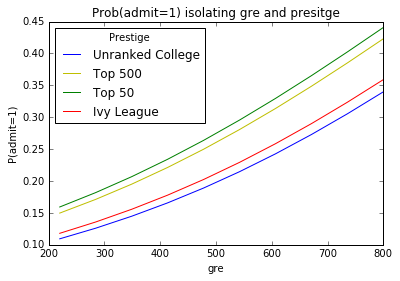

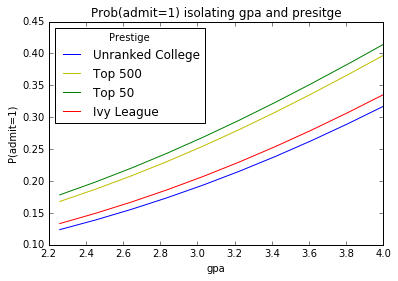

In [172]:
def isolate_and_plot(variable): 

    grouped = pd.pivot_table(combos, values=['admission'], index=[variable, 'prestige'], 
                             aggfunc=np.mean) 
      

    colors = 'rbygrbyg' 
    for col in combos.prestige.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col] 
        pl.plot(plt_data.index.get_level_values(0), plt_data['admission'], color=colors[int(col)]) 
 
 
    pl.xlabel(variable) 
    pl.ylabel("P(admit=1)") 
    pl.legend(['Unranked College', 'Top 500', 'Top 50', 'Ivy League'], loc='upper left', title='Prestige') 
    pl.title("Prob(admit=1) isolating " + variable + " and presitge") 
    pl.show() 

isolate_and_plot('gre') 
isolate_and_plot('gpa') 

